# anytree / graphwiz i Jupyter notebook

For å kjøre kommandoene i en egen notebook i Windows 10 må du først åpne Anaconda Prompt (i nytt environment?) og installere
#### graphwiz
conda install -c anaconda graphviz python-graphviz
#### dependencies for anytree
conda install -c anaconda cached-property

conda install -c conda-forge pyhamcrest
#### anytree
pip install anytree

/n

Så kan du følge "Getting started" fra https://anytree.readthedocs.io/en/latest/ med små modifikasjoner (below)

/n

### Construction

In [1]:
from anytree import Node, RenderTree
udo = Node("Udo")
marc = Node("Marc", parent=udo)
lian = Node("Lian", parent=marc)
dan = Node("Dan", parent=udo)
jet = Node("Jet", parent=dan)
jan = Node("Jan", parent=dan)
joe = Node("Joe", parent=dan)

#### Node

In [2]:
print(udo)
print(joe)

#### Tree

In [3]:
for pre, fill, node in RenderTree(udo):
    print("%s%s" % (pre, node.name))

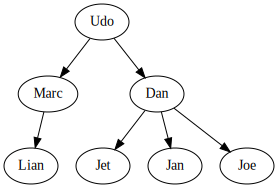

In [4]:
from anytree.exporter import DotExporter
# graphviz needs to be installed for the next line!
# DotExporter(udo).to_picture("udo.png") 
# NOPE: https://stackoverflow.com/questions/51447235/python-not-able-to-graph-trees-using-graphviz-with-the-anytree-package
# Below is a workaround
DotExporter(udo).to_dotfile('udo.dot')

from graphviz import Source
Source.from_file('udo.dot')

In [5]:
# And to save the above, do this:
from graphviz import render
render('dot', 'png', 'udo.dot') 

'udo.dot.png'

### Manipulation

A second tree:

In [6]:
mary = Node("Mary")
urs = Node("Urs", parent=mary)
chris = Node("Chris", parent=mary)
marta = Node("Marta", parent=mary)
print(RenderTree(mary))

Node('/Mary')
├── Node('/Mary/Urs')
├── Node('/Mary/Chris')
└── Node('/Mary/Marta')


#### Append

In [7]:
udo.parent = mary
print(RenderTree(mary))

Node('/Mary')
├── Node('/Mary/Urs')
├── Node('/Mary/Chris')
├── Node('/Mary/Marta')
└── Node('/Mary/Udo')
    ├── Node('/Mary/Udo/Marc')
    │   └── Node('/Mary/Udo/Marc/Lian')
    └── Node('/Mary/Udo/Dan')
        ├── Node('/Mary/Udo/Dan/Jet')
        ├── Node('/Mary/Udo/Dan/Jan')
        └── Node('/Mary/Udo/Dan/Joe')


#### Subtree rendering

In [8]:
print(RenderTree(marc))

Node('/Mary/Udo/Marc')
└── Node('/Mary/Udo/Marc/Lian')


#### Cut

In [9]:
dan.parent = None
print(RenderTree(dan))

Node('/Dan')
├── Node('/Dan/Jet')
├── Node('/Dan/Jan')
└── Node('/Dan/Joe')
